In [21]:
import pandas as pd

In [22]:
import numpy as np

In [23]:
import matplotlib.pyplot as plt

In [24]:
%matplotlib inline

## Load and Clean the Data
Our first step is to load the data and group the loan data by issue datas

In [25]:
df = pd.read_csv('/Users/Chang/projects/LoanStats3b.csv',header=1,low_memory = False)

In [26]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,10129403,11981032.0,7550.0,7550.0,7550.0,36 months,16.24%,266.34,C,C5,...,0.0,0.0,100.0,100.0,0.0,0.0,8000.0,5759.0,4000.0,0.0
1,10149342,12000897.0,27050.0,27050.0,27050.0,36 months,10.99%,885.46,B,B2,...,0.0,1.0,100.0,25.0,0.0,0.0,138554.0,70186.0,35700.0,33054.0
2,10159584,12011200.0,9750.0,9750.0,9750.0,36 months,13.98%,333.14,C,C1,...,0.0,2.0,100.0,66.7,0.0,0.0,21314.0,14123.0,7200.0,6214.0
3,10159498,1319523.0,12000.0,12000.0,12000.0,36 months,6.62%,368.45,A,A2,...,0.0,2.0,95.5,0.0,0.0,0.0,333044.0,42603.0,52600.0,42769.0
4,10129506,11981122.0,20800.0,20800.0,20800.0,36 months,13.53%,706.16,B,B5,...,0.0,3.0,90.2,50.0,0.0,0.0,43100.0,23473.0,15000.0,0.0


In [27]:
df.shape

(188125, 111)

In [28]:
df['issue_d_format'] = pd.to_datetime(df['issue_d'],format = "%b-%Y") 

In [29]:
dfts = df.set_index(df['issue_d_format'][0:],drop=True)

In [30]:
dfts.iloc[0:10,0:10]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade
issue_d_format,,,,,,,,,,
2013-12-01,10129403,11981032.0,7550.0,7550.0,7550.0,36 months,16.24%,266.34,C,C5
2013-12-01,10149342,12000897.0,27050.0,27050.0,27050.0,36 months,10.99%,885.46,B,B2
2013-12-01,10159584,12011200.0,9750.0,9750.0,9750.0,36 months,13.98%,333.14,C,C1
2013-12-01,10159498,1319523.0,12000.0,12000.0,12000.0,36 months,6.62%,368.45,A,A2
2013-12-01,10129506,11981122.0,20800.0,20800.0,20800.0,36 months,13.53%,706.16,B,B5
2013-12-01,10159548,12011167.0,15000.0,15000.0,15000.0,36 months,8.90%,476.30,A,A5
2013-12-01,10179520,12031088.0,3000.0,3000.0,3000.0,36 months,12.85%,100.87,B,B4
2013-12-01,10139658,11991209.0,12000.0,12000.0,12000.0,36 months,13.53%,407.40,B,B5
2013-12-01,10159611,12011228.0,10000.0,10000.0,10000.0,36 months,9.67%,321.13,B,B1


In [31]:
grouped = dfts.groupby(lambda x: x.year*100 + x.month)

In [32]:
year_month_summary = grouped.count()

In [33]:
grouped

In [34]:
loan_count_summary = year_month_summary['issue_d']

In [35]:
loan_count_summary


201201.0     2602
201202.0     2560
201203.0     2914
201204.0     3230
201205.0     3400
201206.0     3817
201207.0     4627
201208.0     5419
201209.0     6087
201210.0     6263
201211.0     6382
201212.0     6066
201301.0     6872
201302.0     7561
201303.0     8273
201304.0     9419
201305.0    10350
201306.0    10899
201307.0    11910
201308.0    12674
201309.0    12987
201310.0    14115
201311.0    14676
201312.0    15020
Name: issue_d, dtype: int64

In [36]:
loan_count_summary.index = loan_count_summary.index.map( lambda x: str(int(x)) )

In [37]:
loan_count_summary.index = pd.to_datetime(loan_count_summary.index, format = "%Y%m")

In [38]:
loan_count_summary

2012-01-01     2602
2012-02-01     2560
2012-03-01     2914
2012-04-01     3230
2012-05-01     3400
2012-06-01     3817
2012-07-01     4627
2012-08-01     5419
2012-09-01     6087
2012-10-01     6263
2012-11-01     6382
2012-12-01     6066
2013-01-01     6872
2013-02-01     7561
2013-03-01     8273
2013-04-01     9419
2013-05-01    10350
2013-06-01    10899
2013-07-01    11910
2013-08-01    12674
2013-09-01    12987
2013-10-01    14115
2013-11-01    14676
2013-12-01    15020
Name: issue_d, dtype: int64

## Stationarity Analysis
Second step, we plot the Time Series data and apparently it's not stationary. There is a obvious trend component in it. Also, by the Dickey-Fuller test, we know the Test Statistic is way bigger than the critical values, which means the data is not stationary. 


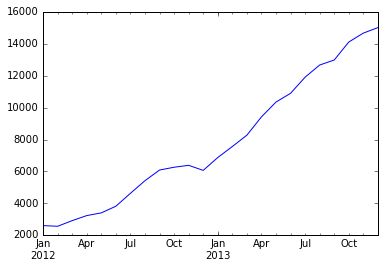

In [39]:
loan_count_summary.plot()

In [40]:
from statsmodels.tsa.stattools import adfuller

In [41]:
 def test_stationarity(ts):
    print 'Results of Dickey-Fuller Test:'
    dftest = adfuller(ts, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput

In [42]:
test_stationarity(loan_count_summary)

Results of Dickey-Fuller Test:
Test Statistic                  2.431499
p-value                         0.999024
#Lags Used                      8.000000
Number of Observations Used    15.000000
Critical Value (5%)            -3.084908
Critical Value (1%)            -3.964443
Critical Value (10%)           -2.681814
dtype: float64


In [43]:
import statsmodels.api as sm

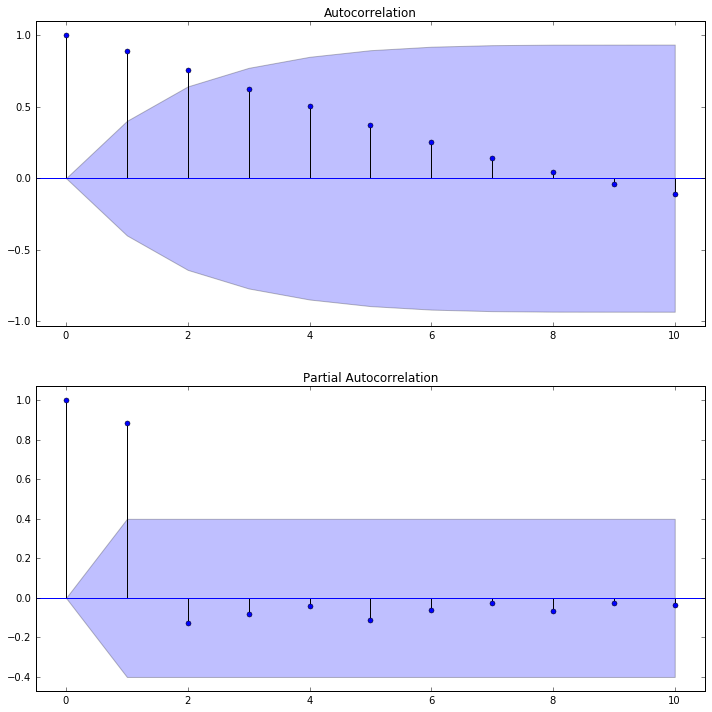

In [55]:
fig, ax = plt.subplots(2,1,figsize = (12,12))
fig = sm.graphics.tsa.plot_acf(loan_count_summary, lags = 10,ax = ax[0])
fig = sm.graphics.tsa.plot_pacf(loan_count_summary, lags = 10, ax = ax[1])


## Data Transformation
We will try to transform the data to be more stationary by: First, get log of the data; Second, difference the data by 1. After the transformation, the Dickey-Fuller test still indicates non-stationary data with the Test Statistics bigger than Critical Values, while it's closer than before transformation.

In [45]:
loan_count_summary_log = np.log(loan_count_summary)

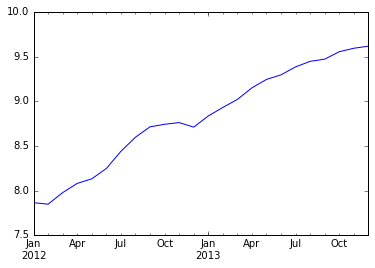

In [46]:
loan_count_summary_log.plot()

In [47]:
loan_count_summary_dif = loan_count_summary_log - loan_count_summary_log.shift(periods = 1)

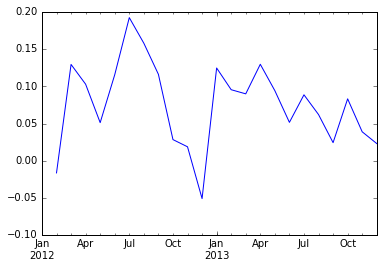

In [48]:
loan_count_summary_dif.plot()

In [49]:
test_stationarity(loan_count_summary_dif[1:])

Results of Dickey-Fuller Test:
Test Statistic                 -0.146435
p-value                         0.944612
#Lags Used                      9.000000
Number of Observations Used    13.000000
Critical Value (5%)            -3.127149
Critical Value (1%)            -4.068854
Critical Value (10%)           -2.701730
dtype: float64


## The ACF and PACF here does not make sense. ??

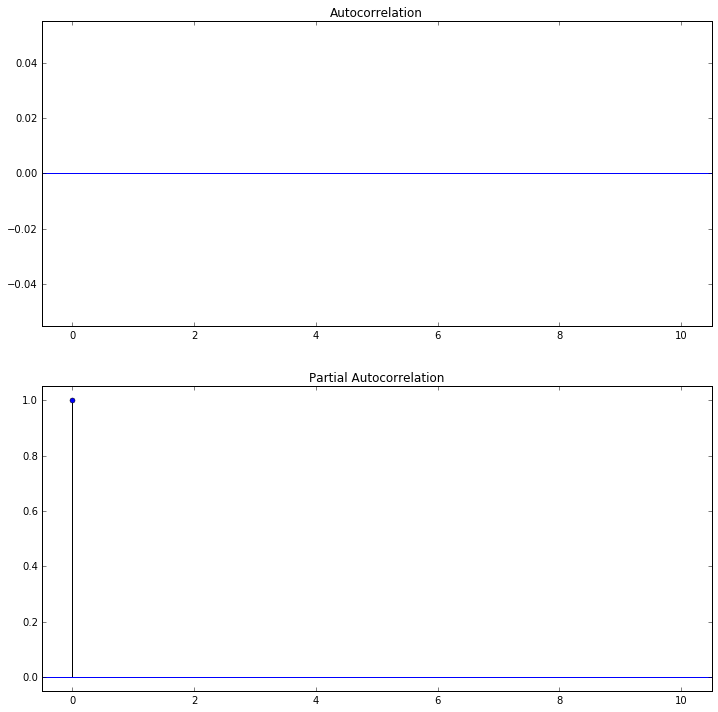

In [56]:
fig, ax = plt.subplots(2,1,figsize = (12,12))
fig = sm.graphics.tsa.plot_acf(loan_count_summary_dif, lags = 10,ax = ax[0])
fig = sm.graphics.tsa.plot_pacf(loan_count_summary_dif, lags = 10, ax = ax[1])


## Here we use ARIMA model to model the data.

In [51]:
from statsmodels.tsa.arima_model import ARIMA


In [52]:
model = ARIMA(loan_count_summary_dif[1:], order=(1, 1, 0))  

In [53]:
results_AR = model.fit(disp=-1) 

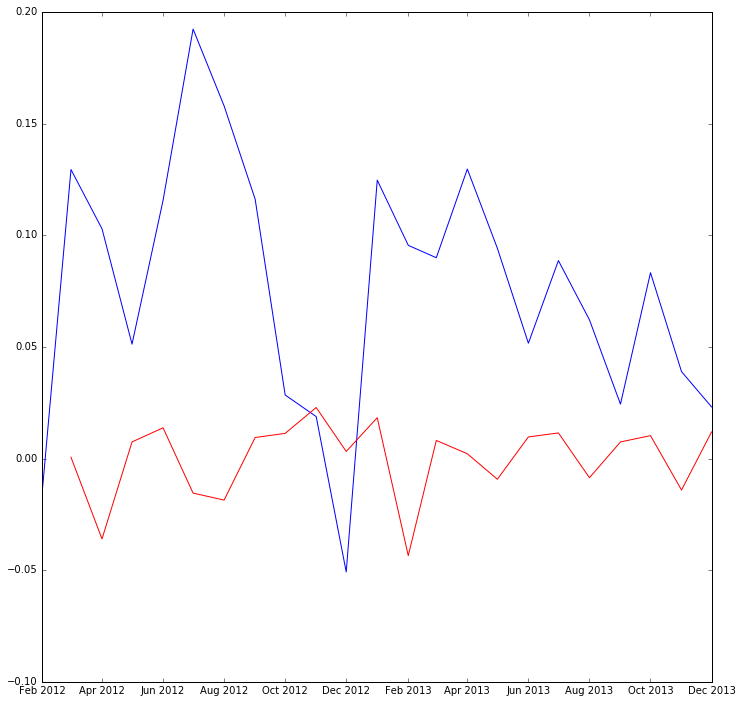

In [54]:
fig = plt.figure(figsize=(12,12))
plt.plot(loan_count_summary_dif)
plt.plot(results_AR.fittedvalues, color='red')